In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, gaussian_kde

In [2]:
def make_data(N, f=0.3, rseed=1):
    rand = np.random.RandomState(rseed)
    x = rand.randn(N)
    x[int(f * N):] += 2
    return x

x = make_data(13,rseed=1)
x

array([ 1.62434536, -0.61175641, -0.52817175,  0.92703138,  2.86540763,
       -0.3015387 ,  3.74481176,  1.2387931 ,  2.3190391 ,  1.75062962,
        3.46210794, -0.06014071,  1.6775828 ])

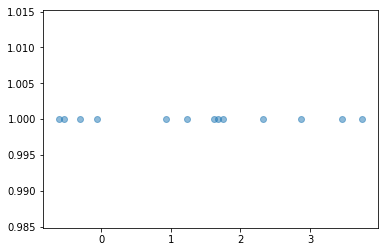

In [3]:
plt.scatter(x,[1]*len(x),alpha=0.5)

In [4]:
kernel = gaussian_kde(x)
space = np.linspace(-10,15,100)
density = kernel.pdf(space)
density

array([1.17989623e-26, 2.40965569e-25, 4.53515247e-24, 7.86616630e-23,
       1.25741350e-21, 1.85245316e-20, 2.51525402e-19, 3.14770839e-18,
       3.63077171e-17, 3.86020535e-16, 3.78308114e-15, 3.41761548e-14,
       2.84618731e-13, 2.18518942e-12, 1.54676736e-11, 1.00948253e-10,
       6.07492639e-10, 3.37120645e-09, 1.72531756e-08, 8.14391524e-08,
       3.54587474e-07, 1.42426125e-06, 5.27822015e-06, 1.80500451e-05,
       5.69678963e-05, 1.65966060e-04, 4.46407438e-04, 1.10882970e-03,
       2.54410244e-03, 5.39361026e-03, 1.05699829e-02, 1.91579276e-02,
       3.21380805e-02, 4.99514802e-02, 7.20485482e-02, 9.66757324e-02,
       1.21140629e-01, 1.42600658e-01, 1.59105991e-01, 1.70387452e-01,
       1.77915672e-01, 1.84110854e-01, 1.91065191e-01, 1.99444481e-01,
       2.08152066e-01, 2.14909647e-01, 2.17401768e-01, 2.14349062e-01,
       2.05968425e-01, 1.93660220e-01, 1.79189518e-01, 1.63858900e-01,
       1.48103414e-01, 1.31650249e-01, 1.14062401e-01, 9.53062256e-02,
      

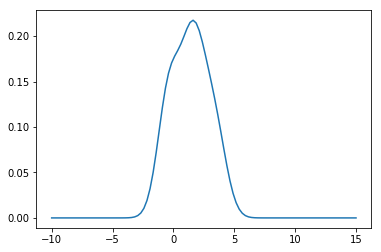

In [5]:
plt.plot(space,density)

In [6]:
df = pd.read_csv("station_53.csv", names=['modelId','station_num','timeFrom','prognoses'])
pt = pd.pivot_table(df,values='prognoses', index ='timeFrom', columns='modelId')

FileNotFoundError: File b'station_53.csv' does not exist

In [ ]:
import plotly.express as px
fig = px.line(df, x='timeFrom', y="prognoses", color='modelId')
fig.show()

In [ ]:
pt.max(axis=0)

In [ ]:
min_val = pt.min().min()
max_val = pt.max().max()

(min_val,max_val)


In [ ]:
def make_pdf(row,res=400):
  val = row.dropna().values
  kernel = gaussian_kde(val)
  space = np.linspace(min_val,max_val,res)
  prob = kernel.pdf(space)
  interval = (max_val-min_val)/res
  return pd.Series(prob*interval)



def make_cdf(row,res=400):
  prob = make_pdf(row,res)
  cumulative = prob.cumsum()
  
  return pd.Series(cumulative)

In [ ]:
df1 = pt.apply(make_pdf,axis=1)
df2 = pt.apply(make_cdf,axis=1)
df1.columns = np.linspace(min_val,max_val,400)
df2.columns = np.linspace(min_val,max_val,400)


In [7]:
import plotly.graph_objects as go


fig = go.Figure(data=go.Heatmap(
        x = df1.index,
        y=  df1.columns,
        z=df1.T,
        colorscale='rdBu'))

fig.update_xaxes(type='date',title='month')
fig.update_yaxes(type='linear',title='station')
fig.update_layout(yaxis = {'tickfont': {'size': 7}})

fig.update_layout(height=600)
fig.show()

ModuleNotFoundError: No module named 'plotly.graph_objects'

In [ ]:
fig = go.Figure(data=go.Heatmap(
        x = df2.index,
        y=  df2.columns,
        z=1-df2.T,
        colorscale='rdBu'))

fig.update_xaxes(type='date',title='month')
fig.update_yaxes(type='linear',title='station')
fig.update_layout(yaxis = {'tickfont': {'size': 7}})

fig.update_layout(height=600)
fig.show()

In [ ]:
from plotly.subplots import make_subplots
fig = make_subplots(2, 1, vertical_spacing=0.15)
fig.add_trace(go.Heatmap(
        x = df1.index,
        y=  df1.columns,
        z=df1.T,
        colorscale='rdBu'),1,1)

fig.add_trace(go.Heatmap(
        x = df2.index,
        y=  df2.columns,
        z=1-df2.T,
        colorscale='rdBu'))

fig.show()